Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np

Read data

In [18]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/EquationCitations.csv')
df = df.drop(df.columns[0], axis=1)

Data Info

In [ ]:
print(df.info())

Assigning continuous and categorical in arrays

In [25]:
continuous = ['startpage', 'pages', 'equations', 'mainequations', 'appequations', 'cites', 'selfcites', 'othercites', 'theocites', 'nontheocites']
categorical = ['journal', 'authors', 'volume']


Total number of values

In [ ]:
print(df.shape[0])

# __Continuous Section__

Max values 

In [ ]:
for i in continuous:
    print(df[i].max())


Min values 

In [ ]:
for i in continuous:
    print(df[i].min())

Cardinality 

In [ ]:
for i in continuous:
    print(df[i].nunique())

Percentage of Missing Values

In [ ]:
for i in continuous:
    print(df[i].isna().sum()/df.shape[0]*100)

1st quartile

In [ ]:
for i in continuous:
    print(df[i].quantile(0.25))

3rd quartile

In [ ]:
for i in continuous:
    print(df[i].quantile(0.75))

Average

In [ ]:
for i in continuous:
    print(f'{df[i].mean(): .3f}')

Median

In [ ]:
for i in continuous:
    print(df[i].median())

Standard Deviation

In [ ]:
for i in continuous:
    print(f"{df[i].std(): .3f}")

# __Categorical Section__

Percentage of Missing Values

In [ ]:
for i in categorical:
    print(df[i].isna().sum()/df.shape[0]*100)q

Cardinality

In [ ]:
for i in categorical:
    print(df[i].nunique())

Mode

In [ ]:
for i in categorical:
    print(df[i].mode().iloc[0])

Frequency Value of the mode

In [ ]:
for i in categorical:
    print(df[i].value_counts().iloc[0])

Percentage Value of the Mode



In [ ]:
for i in categorical:
    print(f"{df[i].value_counts().iloc[0]/df.shape[0]*100 : .2f}")

2nd mode value



In [ ]:
for i in categorical:
    print(df[i].value_counts().index[1])

In [28]:
df['journal'].value_counts()

ProcB        262
Evolution    142
AmNat         52
Name: journal, dtype: int64

2nd mode frequency value



In [ ]:
for i in categorical:
    print(df[i].value_counts().iloc[1])

Percentage of 2nd mode


In [ ]:
for i in categorical:
    print(f"{df[i].value_counts().iloc[1]/df.shape[0]*100 : .2f}")

__Tables__

Continuous

In [ ]:
table = PrettyTable()
table.field_names = ['Continuous Attribute Name','Total Number Of Values', 'Percentage Of Missing Values', 'Cardinality', 'Min', 'Max', '1st Quartile', '3rd Quartile', 'Average', 'Median', 'Standard Deviation']
for i in continuous:
    table.add_row([i, df.shape[0], f"{df[i].isna().sum()/df.shape[0]*100 : .2f}", df[i].nunique(), df[i].min(), df[i].max(), df[i].quantile(0.25), df[i].quantile(0.75), f"{df[i].mean(): .3f}", df[i].median(), f"{df[i].std(): .3f}"])
table.align = 'c'
print(table.get_string(title="Continuous Attributes"))

Categorical

In [ ]:
table = PrettyTable()
table.field_names = ['Categorical Attribute Name','Total Number Of Values', 'Percentage Of Missing Values', 'Cardinality', 'Mode', 'Frequency Value of The Mode', 'Percentage Value Of The Mode', '2nd Mode Value', '2nd Mode Frequency Value', 'Percentage Of 2nd Mode']
for i in categorical:
    table.add_row([i, df.shape[0], f"{df[i].isna().sum()/df.shape[0]*100 : .2f}", df[i].nunique(), df[i].mode().iloc[0], df[i].value_counts().iloc[0], f"{df[i].value_counts().iloc[0]/df.shape[0]*100 : .2f}", df[i].value_counts().index[1], df[i].value_counts().iloc[1], f"{df[i].value_counts().iloc[1]/df.shape[0]*100 : .2f}" ])
table.align = 'l'
print(table.get_string(title="Categorical Attributes"))

# __Histograms__

Continuous

In [ ]:
for i in continuous:
    columns = int(1 + 3.22 * np.log10(df.shape[0]))
    df[i].hist(bins=columns)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()

Categorical

In [ ]:
for i in categorical:  
    columns = int(1 + 3.22 * np.log10(df.shape[0]))
    df[i].hist(bins=columns)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
 

# __Outliers__

In [4]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    ls = df.index[(df[column] < lower) | (df[column] > upper)]
    return ls

In [21]:
index_list = []
for i in continuous:
    index_list.extend(outliers(df, i))

In [6]:
def remove_outliers(df, ls):
    ls = sorted(set(ls)) # remove duplicates and sort
    df = df.drop(ls)
    return df, ls

In [22]:

df, ls = remove_outliers(df, index_list)
print(len(ls))

193


In [ ]:
df = df.drop('appequations', axis=1)
continuous.remove('appequations')

In [ ]:
for i in continuous:
    columns = int(1 + 3.22 * np.log10(df.shape[0]))
    df[i].hist(bins=columns)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()

# __Scatter__

Scatter plots between continuous attributes

In [15]:
def plot_scatter(x, y, xlabel, ylabel):
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} vs {ylabel}')
    plt.show()


In [ ]:
for i in continuous:
    for j in continuous:
        plot_scatter(df[i], df[j], i, j)

Scatter matrix

In [ ]:
pd.plotting.scatter_matrix(df[continuous], figsize=(10,10))

Bar plot for categorical attributes

In [ ]:
for i in categorical:
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()

Box plots depicting relatioships between categorical and continuous attributes

<AxesSubplot: title={'center': 'othercites'}, xlabel='volume'>

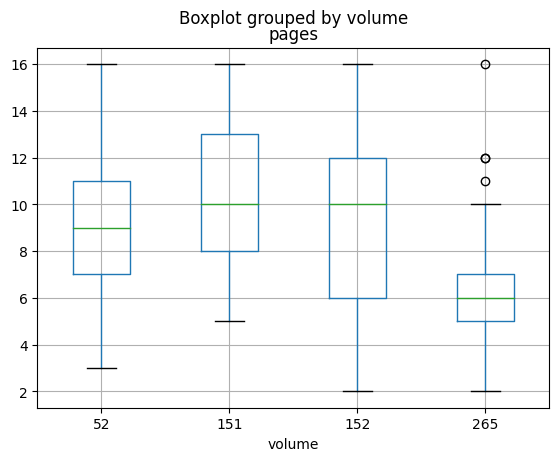

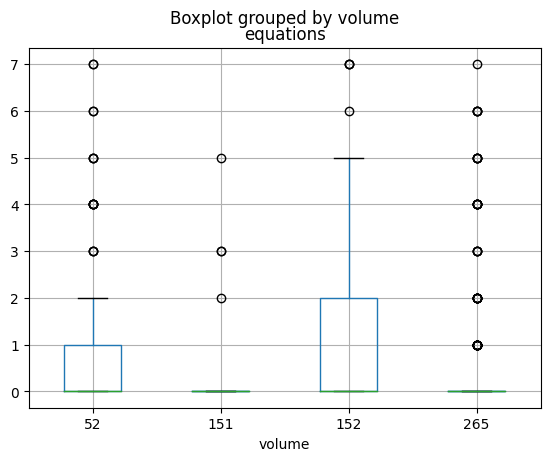

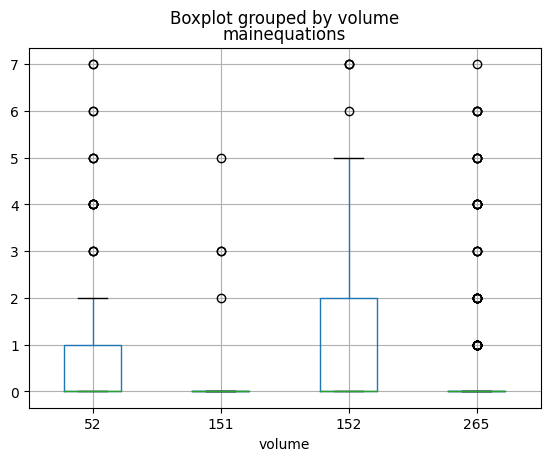

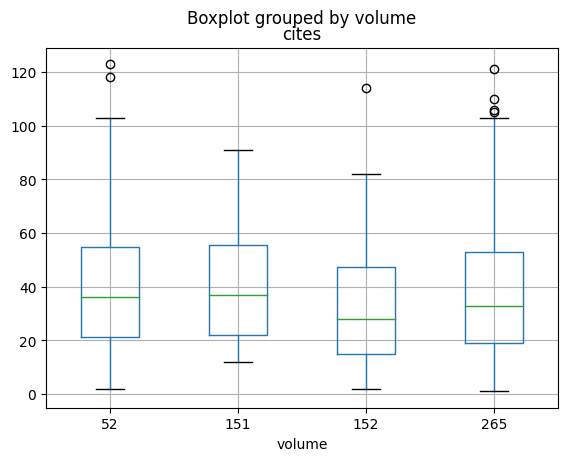

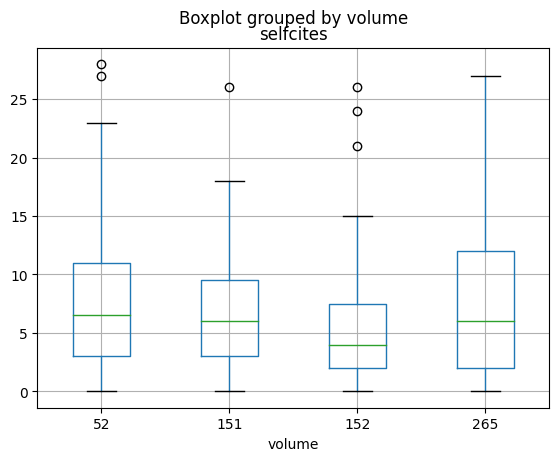

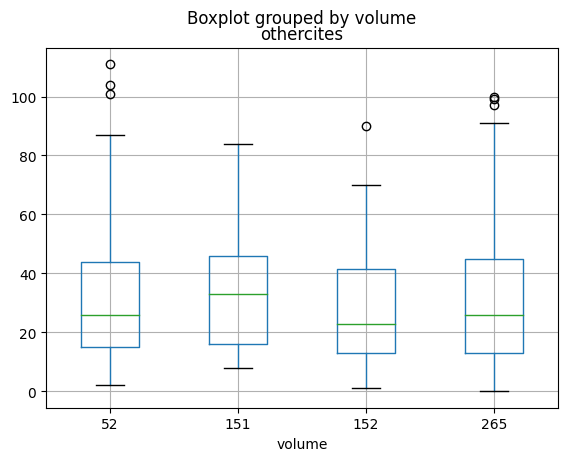

In [10]:
df.boxplot(column='pages', by='volume')
df.boxplot(column='equations', by='volume')
df.boxplot(column='mainequations', by='volume')
df.boxplot(column='cites', by='volume')
df.boxplot(column='selfcites', by='volume')
df.boxplot(column='othercites', by='volume')

In [ ]:
df.boxplot(column='pages', by='journal')

Histogram depicting relatioships between categorical and continuous attributes

In [46]:
def plot_hist(df, x,y ):
    df.groupby(x)[y].hist(alpha=0.6, label=[x,y], stacked=True)
    plt.title(f'{y} by {x}')
    plt.legend()
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
plot_hist(df, 'journal', 'pages')
plot_hist(df, 'volume', 'equations')
plot_hist(df, 'volume', 'mainequations')
plot_hist(df, 'volume', 'cites')
plot_hist(df, 'volume', 'selfcites')
plot_hist(df, 'volume', 'othercites')
plot_hist(df, 'volume', 'theocites')
plot_hist(df, 'volume', 'nontheocites')

Continuous covariance

In [ ]:
df['continuous'].cov()

Continuous correlation

In [ ]:
df.corr()

Correlation matrix

In [ ]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


Normalization in the boundary [0;1]

Before normalization

In [ ]:
df.describe()

After normalization

In [39]:
for i in continuous:
    df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

In [ ]:
df.describe()

Convert categorical variables to continuous type variables

In [39]:
df.describe()

,volume,startpage,pages,equations,mainequations,cites,selfcites,othercites,theocites,nontheocites
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,186.908686,1073.216036,7.708241,0.661470,0.661470,38.467706,7.605791,30.861915,5.309577,24.385301
std,96.426893,664.466643,2.860124,1.522556,1.522556,24.361479,6.352591,21.717414,4.982104,18.038918
min,52.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,523.000000,6.000000,0.000000,0.000000,19.000000,3.000000,14.000000,1.000000,10.000000
50%,265.000000,1031.000000,7.000000,0.000000,0.000000,33.000000,6.000000,26.000000,4.000000,21.000000
75%,265.000000,1587.000000,9.000000,0.000000,0.000000,53.000000,11.000000,44.000000,8.000000,35.000000
max,265.000000,2443.000000,16.000000,7.000000,7.000000,123.000000,28.000000,111.000000,26.000000,88.000000


In [40]:
df = pd.get_dummies(df, columns=['journal'])


In [41]:
df.describe()

,volume,startpage,pages,equations,mainequations,cites,selfcites,othercites,theocites,nontheocites,journal_AmNat,journal_Evolution,journal_ProcB
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.00000,449.000000
mean,186.908686,1073.216036,7.708241,0.661470,0.661470,38.467706,7.605791,30.861915,5.309577,24.385301,0.111359,0.30735,0.581292
std,96.426893,664.466643,2.860124,1.522556,1.522556,24.361479,6.352591,21.717414,4.982104,18.038918,0.314927,0.46191,0.493898
min,52.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,52.000000,523.000000,6.000000,0.000000,0.000000,19.000000,3.000000,14.000000,1.000000,10.000000,0.000000,0.00000,0.000000
50%,265.000000,1031.000000,7.000000,0.000000,0.000000,33.000000,6.000000,26.000000,4.000000,21.000000,0.000000,0.00000,1.000000
75%,265.000000,1587.000000,9.000000,0.000000,0.000000,53.000000,11.000000,44.000000,8.000000,35.000000,0.000000,1.00000,1.000000
max,265.000000,2443.000000,16.000000,7.000000,7.000000,123.000000,28.000000,111.000000,26.000000,88.000000,1.000000,1.00000,1.000000
